<a href="https://colab.research.google.com/github/Itallo0708/Computational-Mathematics/blob/main/notebooks/Atividade_2_1_Zero_reais_de_fun%C3%A7%C3%B5es_reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2.1 - Zero reais de funções reais
Importando bibliotecas utilizadas no notebook

In [85]:
import time
import math

# Questão A)
Implementação e análise comparativa de métodos numéricos para busca de raízes, reproduzindo os exemplos do livro texto.

#1) Método da Bisseção
# 1.1) Explicação Teórica
O **Método da Bissecção** é um algoritmo iterativo para encontrar zeros reais de funções. Ele parte da premissa de que temos uma função $f(x)$ contínua em um intervalo $[a, b]$ e que os valores da função nas extremidades deste intervalo possuem sinais opostos, ou seja, $f(a) \cdot f(b) < 0$.

Pelo Teorema de Bolzano, essa condição garante a existência de pelo menos uma raiz real no intervalo. O objetivo do método é reduzir a amplitude deste intervalo sucessivamente até que ela seja menor que uma precisão $\epsilon$ requerida (ou seja, $b - a < \epsilon$).

### Funcionamento Geométrico
O processo consiste em dividir o intervalo ao meio repetidamente. A cada passo $k$, calculamos o ponto médio $x_k$:
$$x_k = \frac{a_k + b_k}{2}$$

Em seguida, analisamos o sinal da função nesse ponto médio para decidir qual subintervalo contém a raiz:

1. Se $f(a_k) \cdot f(x_k) < 0$, a raiz está no subintervalo esquerdo. Fazemos $b_{k+1} = x_k$ e mantemos $a_{k+1} = a_k$.
2. Se $f(a_k) \cdot f(x_k) > 0$, a raiz está no subintervalo direito. Fazemos $a_{k+1} = x_k$ e mantemos $b_{k+1} = b_k$.
3. Se $f(x_k) = 0$, encontramos a raiz exata.










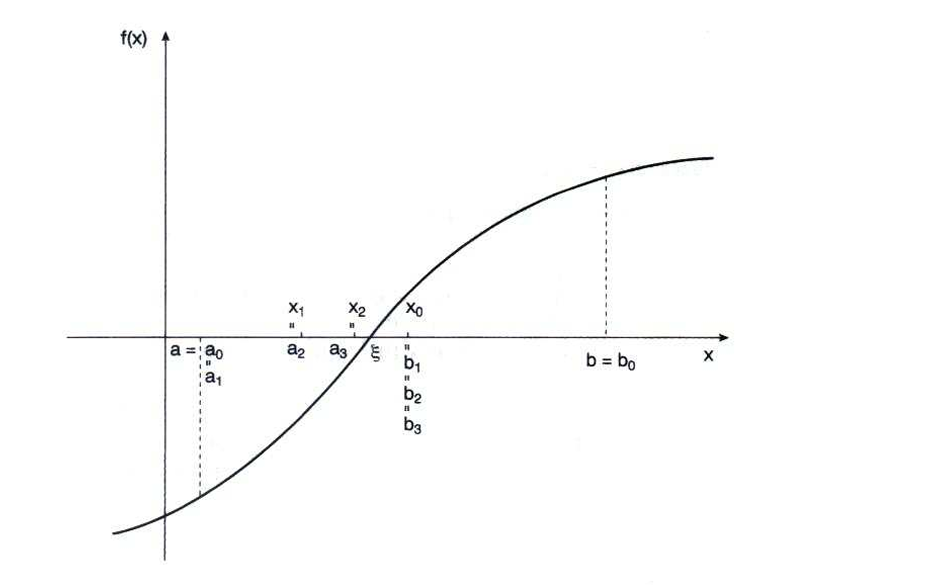

In [86]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/bissecao.png'))

### Convergência
O método gera uma sequência de intervalos aninhados que converge obrigatoriamente para a raiz, desde que as hipóteses iniciais sejam satisfeitas. Embora a convergência seja garantida, ela é considerada lenta quando comparada a outros métodos, pois o erro é reduzido apenas pela metade a cada iteração.

A estimativa do número de iterações $k$ necessárias para atingir uma precisão $\epsilon$ pode ser calculada pela fórmula:
$$k > \frac{\log(b_0 - a_0) - \log(\epsilon)}{\log(2)}$$


# 1.2) Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [87]:
def metodo_bissecao(f,a,b, epsilon):
  # 1. dados iniciais,função, intervalo [a, b] e epsilon

  inicio = time.perf_counter() # inicia marcador de tempo

  if ( b - a) < epsilon:
    fim = time.perf_counter()
    return a, f(a), (b-a), 0, (fim - inicio), 0
    # 2. escolhemos a como raiz pois a diferença do intervalo é pequena o suficiente

  k = 1
  # 3.

  M = f(a)
  # 4. Avaliação da função

  while True:
    x = (a+b)/2
    # 5. valor médio do intervalo

    if M * f(x) > 0:
      a = x
      # 6. teste do sinal

    else:
      b = x
      # 7. b tem o mesmo sinal que o x

    if b - a < epsilon:
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      residuo = f(x)
      # marcadores de tempo
      return x, residuo, (b-a), k, tempo_total, tempo_por_iteracao
      # 8. retorna a raiz
    k = k + 1
    # 9. atualiza a iteração e volta ao passo 5

# 2) Método da Posição Falsa
# 2.1) Explicação Teórica
O Método da Posição Falsa é um método numérico para encontrar raízes de equações reais do tipo $f(x) = 0$. Ele assume que a função $f(x)$ é contínua em um intervalo $[a, b]$ e que existe uma troca de sinal nas extremidades, ou seja, $f(a)f(b) < 0$. Diferente do Método da Bisseção, que simplesmente divide o intervalo ao meio ($x = \frac{a+b}{2}$), o Método da Posição Falsa utiliza as informações sobre a magnitude dos valores de $f(x)$ para estimar a raiz de forma mais eficiente. A lógica é que, se $|f(a)|$ está mais próximo de zero do que $|f(b)|$, é provável que a raiz esteja mais próxima de $a$ do que de $b$.
###Interpretação Geométrica
Geometricamente, a aproximação $\bar{x}$ é o ponto onde a reta secante que conecta os pontos $(a, f(a))$ e $(b, f(b))$ intercepta o eixo $x$. Matematicamente, essa aproximação é calculada como uma média aritmética ponderada entre $a$ e $b$, usando os pesos $|f(b)|$ e $|f(a)|$ respectivamente. A fórmula deduzida é:$$x = \frac{a|f(b)| + b|f(a)|}{|f(b)| + |f(a)|} = \frac{af(b) - bf(a)}{f(b) - f(a)}$$
###Convergência
Se $f(x)$ é contínua no intervalo e possui sinais opostos nas extremidades, o método gera uma sequência convergente.Uma característica importante deste método é o comportamento dos extremos do intervalo. Dependendo da concavidade da função ($f''(x)$), um dos extremos $a$ ou $b$ tende a permanecer fixo enquanto o outro extremo converge em direção à raiz $\xi$. Isso é ilustrado graficamente na Figura a seguir, onde se observa que a aproximação $\bar{x}$ sempre se encontra entre a raiz real e o extremo que não é fixo do intervalo.

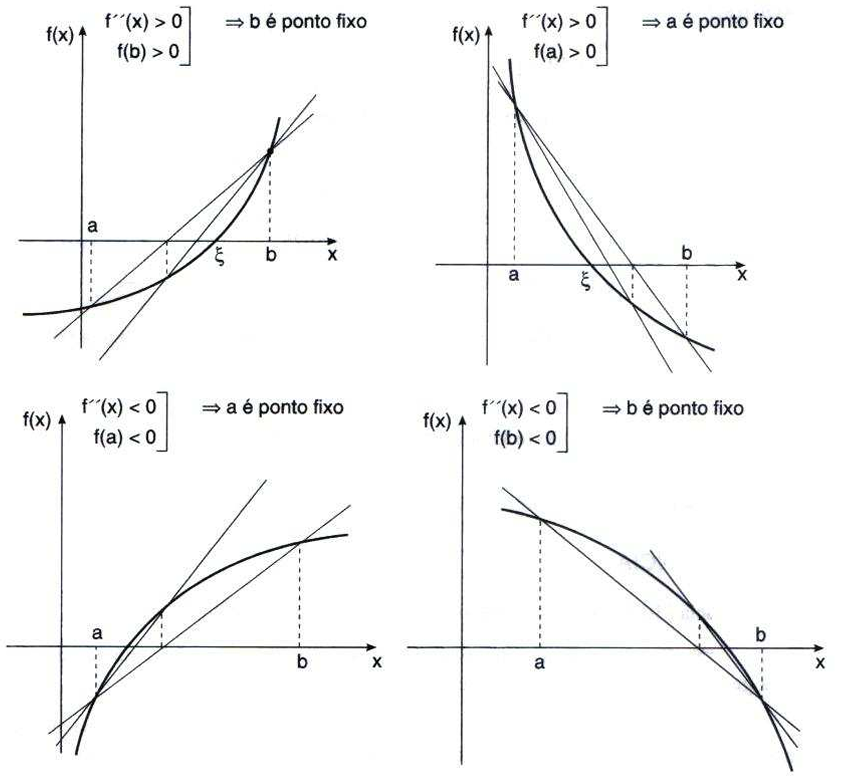

In [88]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/posicao_falsa.png'))

# 2.2) Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [89]:
def metodo_posicao_falsa(f, a, b, epsilon):
  # 1. Dados iniciais

  inicio = time.perf_counter() # inicia marcador de tempo

  if b - a < epsilon:
    fim = time.perf_counter()
    return a, f(a), (b-a), 0, fim - inicio, 0
  elif abs(f(a)) < epsilon:
    fim = time.perf_counter()
    return a, f(a), (b-a), 0, fim - inicio, 0
  elif abs(f(b)) < epsilon:
    fim = time.perf_counter()
    return a, f(b), (b-a), 0, fim - inicio, 0
  # 2. teste das condições de parada para os dados iniciais

  k = 1
  # 3. inicia o contador de iterações

  M = f(a)
  # 4. avalia a função inicalmente em a

  while True:
    x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))
    # 5. valor da média ponderada no intervalo

    if abs(f(x)) < epsilon:
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x, f(x), (b-a), k, tempo_total, tempo_por_iteracao
      # 6. Testa se o x já corresponde a raiz

    if M * f(x) > 0:
      a = x
      # 7. Teste de sinal para substituir o limite de um dos intervalos

    else:
      b = x
      # 8. Substitui o b pelo x caso o teste de sinal seja negativo

    if b - a < epsilon:
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x, f(x), (b-a), k, tempo_total, tempo_por_iteracao
      # 9. Testa se o intervalo já é suficientemente pequeno

    k = k + 1
    # 10. Atualiza o contador de iterações

# 3) Método do Ponto Fixo
# 3.1) Explicação Teórica
O Método do Ponto Fixo (MPF) consiste em transformar a equação original $f(x) = 0$ em uma equação equivalente da forma $x = \varphi(x)$. A função $\varphi(x)$ é denominada função de iteração.A partir de uma aproximação inicial $x_0$, gera-se uma sequência de aproximações $\{x_k\}$ através da relação de recorrência:$$x_{k+1} = \varphi(x_k)$$A ideia central é que, se a sequência convergir, ela convergirá para um ponto $\xi$ tal que $\varphi(\xi) = \xi$, o que implica $f(\xi) = 0$. Ou seja, o problema de encontrar um zero de $f(x)$ é transformado no problema de encontrar um ponto fixo de $\varphi(x)$.
### Interpretação Geométrica
Geometricamente, a raiz da equação $x = \varphi(x)$ corresponde à abscissa do ponto de intersecção entre a reta $y = x$ e a curva $y = \varphi(x)$. O comportamento da convergência pode ser visualizado graficamente de duas formas principais, dependendo do sinal da derivada $\varphi'(x)$:
1. Convergência Monótona ("Escada"): Quando a derivada é positiva ($0 < \varphi'(x) < 1$), a aproximação caminha em degraus em direção à raiz.

2. Convergência Oscilante ("Espiral"): Quando a derivada é negativa ($-1 < \varphi'(x) < 0$), as aproximações alternam-se em torno da raiz, formando uma espiral convergente.



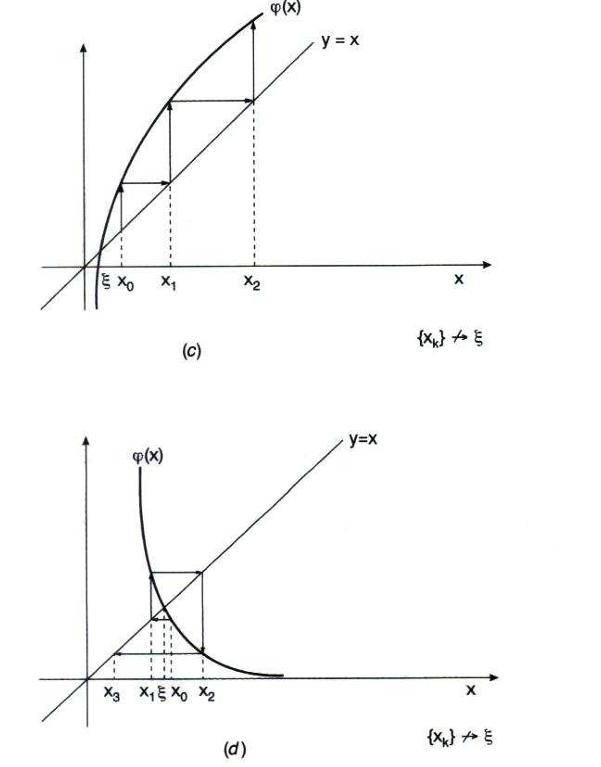

In [90]:
from IPython.display import Image, display
display(Image(filename='/content/sample_data/mpf.png'))

###Teorema de Convergência
Nem toda função de iteração $\varphi(x)$ garante que o método funcione. O Teorema 2 estabelece condições suficientes para a convergência: Seja $\xi$ uma raiz isolada num intervalo $I$ centrado em $\xi$. A sequência converge se:

1. $\varphi(x)$ e $\varphi'(x)$ forem contínuas em $I$.
2. $|\varphi'(x)| \le M < 1$ para todo $x \in I$.
3. A aproximação inicial $x_0$ pertencer a $I$.

Essencialmente, a condição $|\varphi'(x)| < 1$ garante que a função $\varphi$ seja uma contração, diminuindo a distância entre a aproximação e a raiz a cada passo ($|x_{k+1} - \xi| < |x_k - \xi|$).

### Ordem de Convergência
A rapidez com que a sequência $\{x_k\}$ se aproxima da raiz $\xi$ é definida pela sua ordem de convergência. O Método do Ponto Fixo possui, em geral, convergência linear (ordem $p=1$).

A constante assintótica de erro é $C = |\varphi'(\xi)|$. Isso nos leva a uma conclusão prática de que quanto menor for o valor absoluto da derivada $|\varphi'(\xi)|$, mais rápida será a convergência do método.

###Critérios de Parada
O algoritmo utiliza dois critérios principais para interromper as iterações:
1. Erro absoluto entre iterações: $|x_k - x_{k-1}| < \epsilon$.
2. Valor da função: $|f(x_k)| < \epsilon$.

# 3.3 Implementação
Faremos a execução seguindo estritamente a implementação do livro, com a adição de contadores de tempo exigidos no comando da questão.

In [95]:
def metodo_MPF(f, phi, x0, epsilon):
  #1. dados iniciais

  inicio = time.perf_counter() #inicia o medidor de tempo

  if abs(f(x0)) < epsilon:
    fim = time.perf_counter()
    return x0, f(x0), 0.0, 0, fim - inicio, 0
    # 2. testa se o f do chute inicial é suficientemente pequeno

  k = 1
  # 3. Inicia o contador de iterações

  while True:
    x1 = phi(x0)
    # 4. Avalia o phi em x0

    if (abs(f(x1)) < epsilon) or (abs(x1 - x0) < epsilon):
      fim = time.perf_counter()
      tempo_total = fim - inicio
      tempo_por_iteracao = tempo_total / k
      return x1, f(x1), abs(x1 - x0), k, tempo_total, tempo_por_iteracao
      # 5. Testa se f de x1 é suficientemente pequeno e se a distancia x1 - x0 é suficientemente pequena

    x0 = x1
    # 6. Atualiza o valor do x0, que será o novo chute

    k = k +1
    # 7. Atualiza a iteração

# Comparações entre os Métodos
Código para a geração das tabelas

In [91]:
import pandas as pd

def gerar_tabela_comparativa(lista_resultados):

    # Cria o DataFrame
    df = pd.DataFrame(lista_resultados)

    colunas_ordem = ['Metodo', 'Dados Iniciais', 'Raiz (x_barra)', 'f(x_barra)', 'Erro em x', 'Iterações', 'Tempo Total (s)', 'Tempo por Iteração']

    df = df[colunas_ordem]

    # Transpõe a tabela para ajuste
    df_transposta = df.set_index('Metodo').T

    return df_transposta



Código para criação de dicionários com os resultados

In [92]:
def criar_dicionario(nome_metodo, dados_iniciais_str, tupla_resultados):

    raiz, residuo, erro, k, t_total, t_medio = tupla_resultados

    # 2. Monta o dicionário com as chaves exatas que a tabela espera
    return {
        'Metodo': nome_metodo,
        'Dados Iniciais': dados_iniciais_str,
        'Raiz (x_barra)': raiz,
        'f(x_barra)': residuo,
        'Erro em x': erro,
        'Iterações': k,
        'Tempo Total (s)': t_total,
        'Tempo por Iteração': t_medio
    }

# exemplo 18

In [93]:
def funcao_exemplo18(x):
  return math.exp(-(x**2)) - math.cos(x)

a = 1
b = 2
epsilon = 10 ** (-2)

resultados_bissecao = metodo_bissecao(funcao_exemplo18, a, b, epsilon)
dict_bissecao = criar_dicionario("Bisseção", f"[{a}, {b}]", resultados_bissecao)

lista_resultados = [dict_bissecao]


tabela_exemplo18 = gerar_tabela_comparativa(lista_resultados)

display(tabela_exemplo18)

Metodo,Bisseção
Dados Iniciais,"[1, 2]"
Raiz (x_barra),1.44531250
f(x_barra),-0.00133500
Erro em x,0.00781250
Iterações,7
Tempo Total (s),1.8325e-05
Tempo por Iteração,2.6179e-06
